__Import Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the dataset into a pandas dataframe
df = pd.read_csv('OnlineNewsPopularity.csv', index_col=0)
print(df.shape)
df.head()

(39644, 60)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
# checking for missing data and viewing statistics 
display(df.info())
display(df.describe().round(3))

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 60 columns):
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null

None

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,...,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000
mean,354.530,10.399,546.515,0.548,0.996,0.689,10.884,3.294,4.544,1.250,...,0.095,0.757,-0.260,-0.522,-0.108,0.282,0.071,0.342,0.156,3395.380
std,214.164,2.114,471.108,3.521,5.231,3.265,11.332,3.855,8.309,4.108,...,0.071,0.248,0.128,0.290,0.095,0.324,0.265,0.189,0.226,11626.951
min,8.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,0.000,0.000,1.000
25%,164.000,9.000,246.000,0.471,1.000,0.626,4.000,1.000,1.000,0.000,...,0.050,0.600,-0.328,-0.700,-0.125,0.000,0.000,0.167,0.000,946.000
50%,339.000,10.000,409.000,0.539,1.000,0.690,8.000,3.000,1.000,0.000,...,0.100,0.800,-0.253,-0.500,-0.100,0.150,0.000,0.500,0.000,1400.000
75%,542.000,12.000,716.000,0.609,1.000,0.755,14.000,4.000,4.000,1.000,...,0.100,1.000,-0.187,-0.300,-0.050,0.500,0.150,0.500,0.250,2800.000
max,731.000,23.000,8474.000,701.000,1042.000,650.000,304.000,116.000,128.000,91.000,...,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.500,1.000,843300.000


### Explore `shares` Target
* The target variable's 50th percentile is 1400 shares. We can use that number as a starting point, to plan separating our dataset into two classes.

In [4]:
# testing lengths to separate the classes
value = 1400
t = df[' shares']

for i in range(6): # print and increment test value by 25, 6 times
    print(f"Number of rows below {value}: ", 
          len(df[t < value]))
    value += 25

Number of rows below 1400:  18490
Number of rows below 1425:  20082
Number of rows below 1450:  20082
Number of rows below 1475:  20082
Number of rows below 1500:  20082
Number of rows below 1525:  21405


In [5]:
# viewing column labels
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [6]:
# make replacements in the listed names
df.columns = df.columns.str.replace(
    ' ',
    ''
).str.replace(
    'num_', 'n'
).str.replace(
    'tokens_', ''
).str.replace(
    'is_', ''
).str.replace(
    'data_', ''
).str.replace(
    'day', ''
).str.replace(
    'week_is', ''
).str.replace(
    'ectivity', ''
).str.replace(
    'arity', ''
).str.replace(
    'entertainment', 'ent'
).str.replace(
    'reference', 'ref'
).str.replace(
    'sharess', 'shares'
).str.replace(
    'average', 'avg'
).str.replace(
    'positive', 'pos'
).str.replace(
    'negative', 'neg'
)

df.columns

Index(['timedelta', 'n_title', 'n_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'nhrefs', 'nself_hrefs',
       'nimgs', 'nvideos', 'avg_token_length', 'nkeywords',
       'channel_lifestyle', 'channel_ent', 'channel_bus', 'channel_socmed',
       'channel_tech', 'channel_world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'week_mon', 'week_tues',
       'week_wednes', 'week_thurs', 'week_fri', 'week_satur', 'week_sun',
       'weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subj', 'global_sentiment_pol', 'global_rate_pos_words',
       'global_rate_neg_words', 'rate_pos_words', 'rate_neg_words',
       'avg_pos_pol', 'min_pos_pol', 'max_pos_pol', 'avg_neg_pol',
       'min_neg_pol', 'max_neg_pol', 'title_subj', 'title_sentiment_pol',
       'abs_title_

__Visualizing Data Distributions__

Quick overview of histograms for data

<Figure size 1512x936 with 0 Axes>

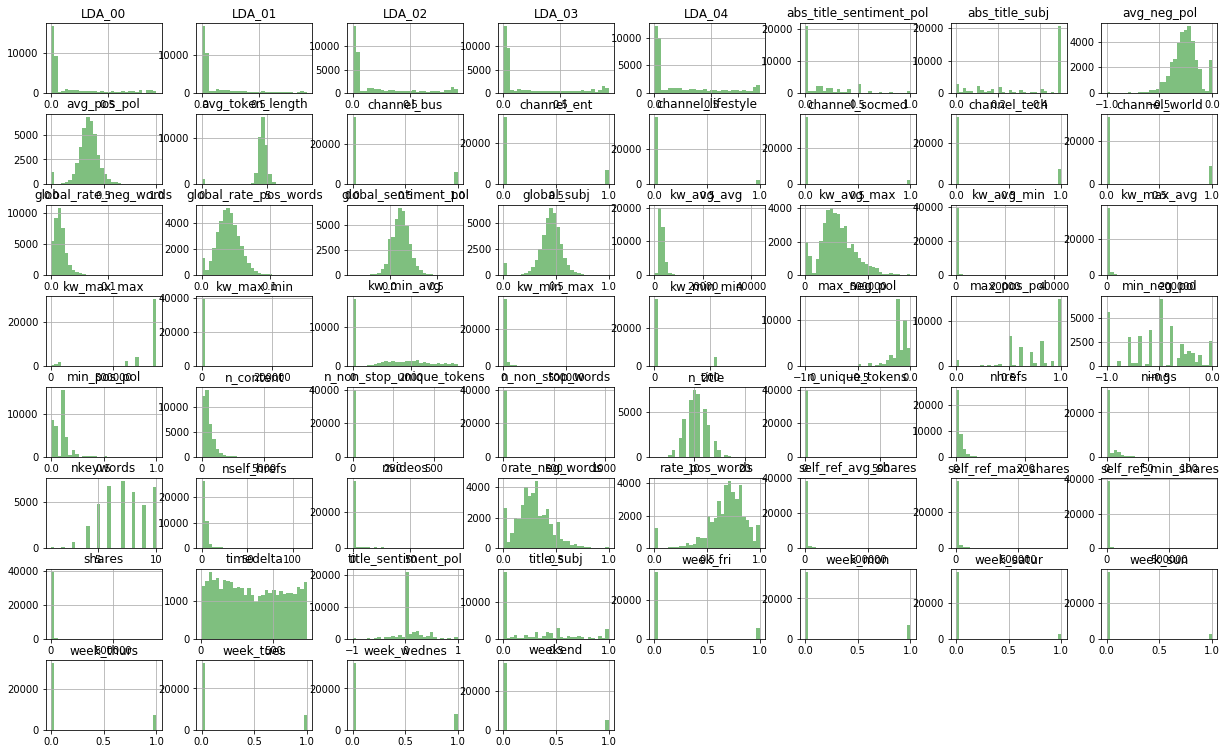

In [7]:
# viewing data histograms
plt.figure(figsize=(21, 13))

df.hist(bins=30, figsize= (21, 13), facecolor="green", alpha=0.5)
plt.title(r"Histogram for Online News Shares",
    fontsize=15)

plt.savefig('images/data-histograms.png', transparent=False)
plt.show()

__Visualizing Data Relationships__

Previewing whether any strong relationships are immediately apparent between column data

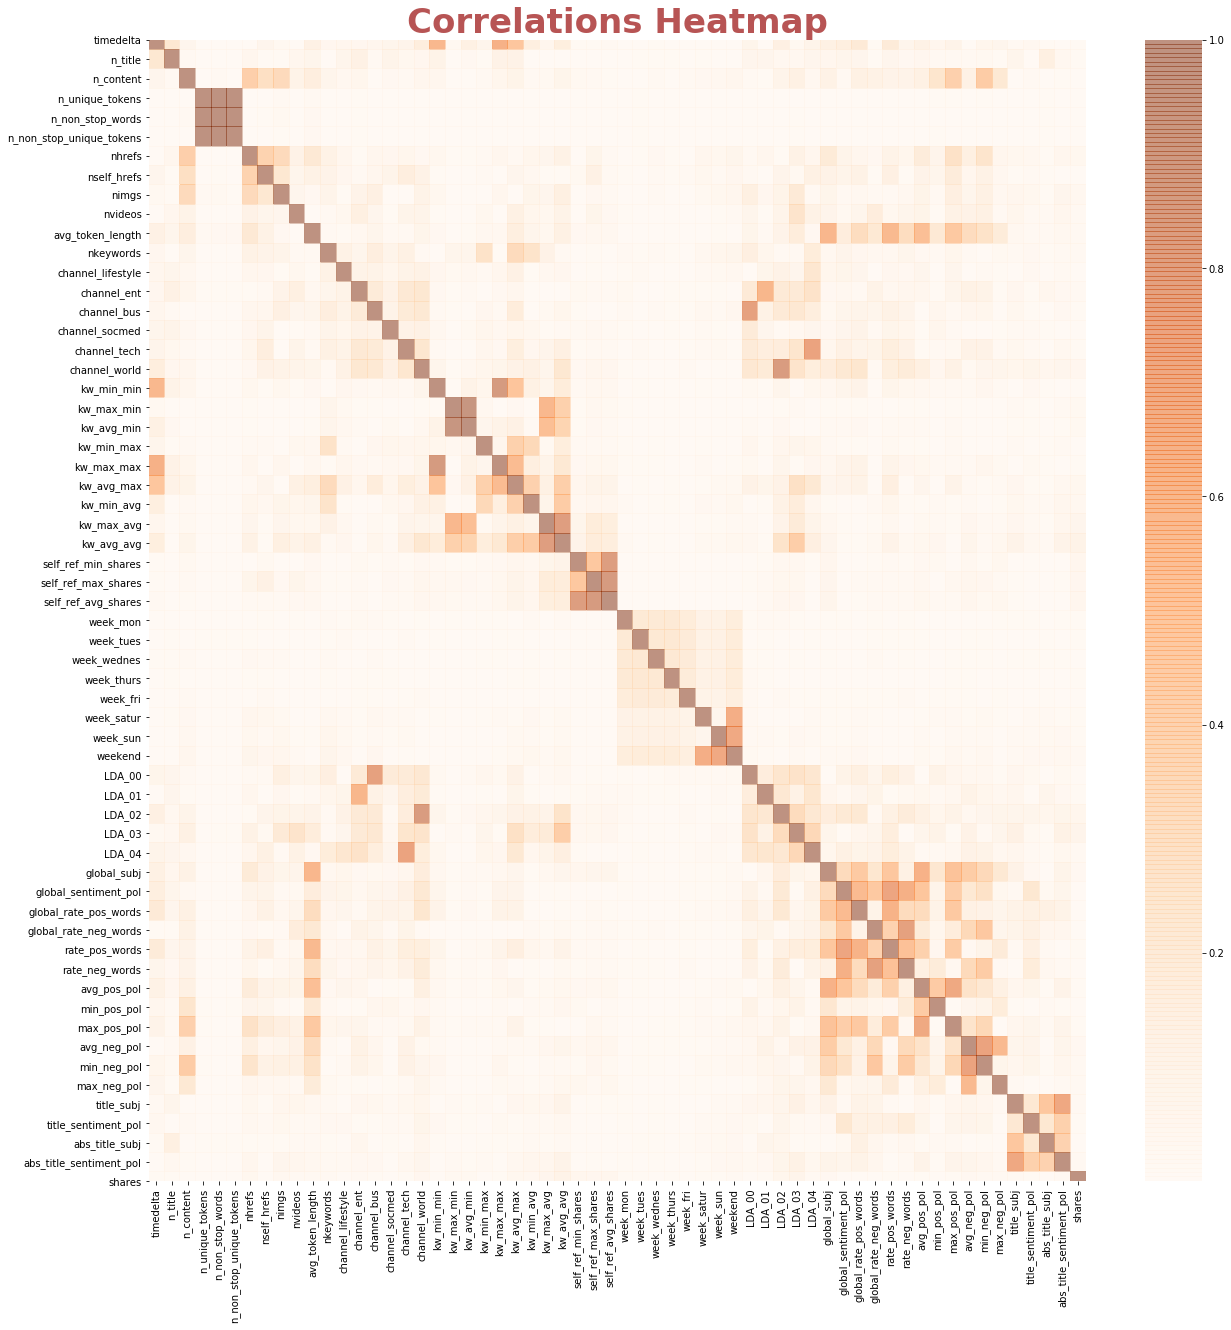

In [8]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(21, 21))
plt.title('Correlations Heatmap',
          fontdict={'fontsize': 34,
                    'color':  'brown',
                    'fontweight':  'bold'},
          alpha=.8)

sns.heatmap(corr.abs(),
            cmap="Oranges", alpha=.5,
            xticklabels=corr.columns,
            yticklabels=corr.columns
            )

plt.savefig('images/correlations-heatmap.png', transparent=False)
plt.show()

### Building a Target

In [9]:
# creating column (value = 1 for rows where `shares` is at least 1500)
df['Shares_plus'] = np.where(df['shares']>=1500, '1', '0').astype('int64')
df.Shares_plus.dtype

dtype('int64')

In [10]:
# viewing the first 10 rows
df[['shares', 'Shares_plus']].head(10)

,shares,Shares_plus
url,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,505,0
http://mashable.com/2013/01/07/beewi-smart-toys/,855,0
http://mashable.com/2013/01/07/bodymedia-armbandgets-update/,556,0
http://mashable.com/2013/01/07/canon-poweshot-n/,891,0
http://mashable.com/2013/01/07/car-of-the-future-infographic/,3600,1


# Explore and Model

__Import Required Libraries__

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import DiscriminationThreshold, roc_auc


np.random.seed(0)


%matplotlib inline


__Load Data__

In [12]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from .csv file
df_2 = pd.read_csv('data/file2.csv',
                   index_col=0)

display(df_2.shape)
df_2.head()

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_plus
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


## Plot Class Counts

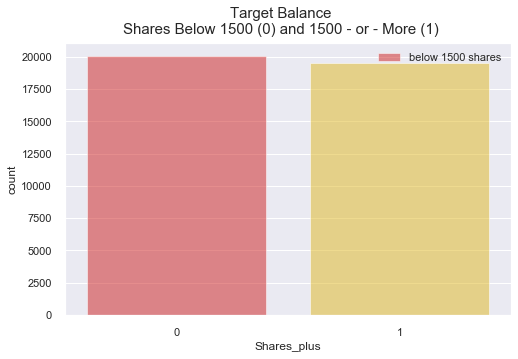

In [13]:
# styling the figure
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

# titling and labeling
plt.suptitle(
    "Target Balance\nShares Below 1500 (0) and 1500 - or - More (1)",
    fontsize=15)
plt.ylabel("count")

# plotting
ax = sns.countplot(x="Shares_plus", alpha=.5, palette="hot", data=df_2)

# adding legend
plt.legend(labels=('below 1500 shares', '1500 and above'))
plt.savefig('images/target-balance.png', transparent=False)

plt.show()

We see a significant range in scale for data in this set; however, scaling is not required for Tree - based models, which is what we will be using to set a modeling baseline.

## Manual Tuning

Build a Base Model

#### Split Predictor Variables and Target

In [16]:
# spliting the dataframe outcome and predictor variables
X = df_2.drop(['shares', 'Shares_plus'], axis=1)  # features
y = df_2['Shares_plus']  # target

# splitting the dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0
                                                    )

### Unfit Logistic Regression

#### ROC - AUC
> Let's plot the receiver operating characteristic (ROC) probability curve and the area underneath the curve (AUC) representing the degree of separability for target classes in an unfitted Logistic Regression model.

In [17]:
warnings.filterwarnings("ignore")


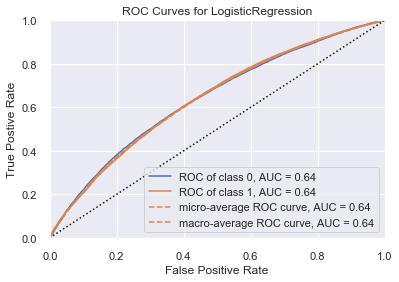

In [18]:
visualizer = roc_auc(LogisticRegression(), X, y)

### Buid a Decision Tree

using the `gini` impurity criterion (to minimize the probability of incorrect classification), which is well suited to binary classification, with a `max_depth` of 5 and a random state of 0

In [19]:
# instantiate and fit a Decision Tree classifier
tree_clf = DecisionTreeClassifier(criterion='gini',
                                  max_depth=5,
                                  random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [20]:
# viewing test set predictions
pred = tree_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3237 1836]
 [1795 3043]] 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      5073
           1       0.62      0.63      0.63      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



#### Confusion Matrix Heatmap

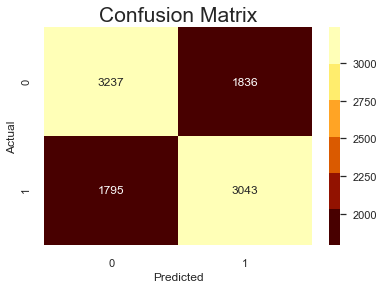

In [21]:
# plotting confusion matrix heatmap
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, cmap=sns.color_palette('afmhot'), annot=True, fmt='0.4g')

plt.autoscale()

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontdict={'fontsize': 21})

plt.savefig('images/dtree-cm-heatmap.png', transparent=False)

plt.show()

#### Feature Importance

Determine which features impact most significantly the outcome, for our Decision Tree model.

In [22]:
# checking feature importances of the trained model
tree_clf.feature_importances_

array([0.06668088, 0.        , 0.        , 0.03397857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00576391, 0.10550961, 0.        ,
       0.07508385, 0.09589684, 0.01117742, 0.        , 0.        ,
       0.00409296, 0.        , 0.        , 0.        , 0.        ,
       0.01493452, 0.3258526 , 0.11303927, 0.        , 0.00380801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09888608, 0.00688671, 0.00954792,
       0.01868913, 0.        , 0.        , 0.        , 0.        ,
       0.00324808, 0.        , 0.00232904, 0.        , 0.00270122,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00189338])

#### Plot Feature Importances

Let's get a more useful view, by displaying feature importances with column names on a horizontal bar plot.

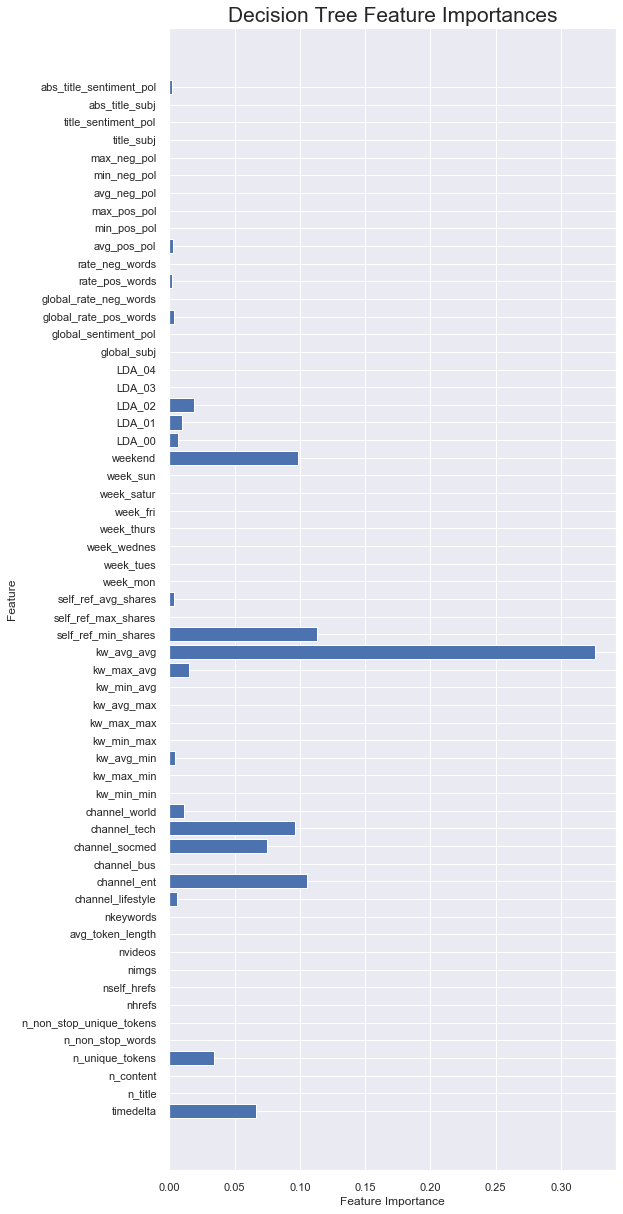

In [23]:
# visualizing Decision Tree feature importances
def plot_feature_importances(model, heading):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 21))
    plt.title(heading, fontdict={'fontsize': 21})
    plt.barh(range(n_features),
             model.feature_importances_,
             align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')


plot_feature_importances(tree_clf, "Decision Tree Feature Importances")

### GridSearchCV Random Forest Pipeline

In [24]:
# building a Random Forest classifier pipeline
rf_pipeline = Pipeline([('ss', StandardScaler()),
                        ('RF', RandomForestClassifier(random_state=0))])

# defining the grid
grid = [{'RF__max_depth': [2, 4, 6],
         'RF__min_samples_split': [2, 5, 10],
         'RF__min_samples_leaf': [1, 3, 5]}]

# defining a grid search with the estimator
# using `refit`, to update the model with optimized hyperparameters
rf_gridsearch = GridSearchCV(estimator=rf_pipeline,
                             param_grid=grid,
                             scoring='accuracy',
                             cv=5,
                             refit=True,
                             n_jobs=-1,
                             verbose=1)

# fitting the training data
rf_gridsearch.fit(X_train, y_train)

# viewing accuracy on the test set
pred = rf_gridsearch.predict(X_test)
print(f"Optimal Parameters: {rf_gridsearch.best_params_}")
print("")
print("rf_gridsearch score: ",
      rf_gridsearch.score(X_test, y_test).round(2))
print("")
print(classification_report(y_test, pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   10.9s finished


Optimal Parameters: {'RF__max_depth': 6, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2}

rf_gridsearch score:  0.65

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      5073
           1       0.64      0.66      0.65      4838

    accuracy                           0.65      9911
   macro avg       0.65      0.65      0.65      9911
weighted avg       0.65      0.65      0.65      9911



We see a two - percent increase in precision and accuracy, as a result of using GridSearchCV to find optimal parameters for tuning a Random Forest model, based on the values in our parameter grid.

### Random Forest Feature Importance

In [25]:
# instantiate a variable for the optimized Random Forest model
rf_model = rf_gridsearch.best_estimator_.steps[1][1]

# viewing the full model and hyperperameters
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

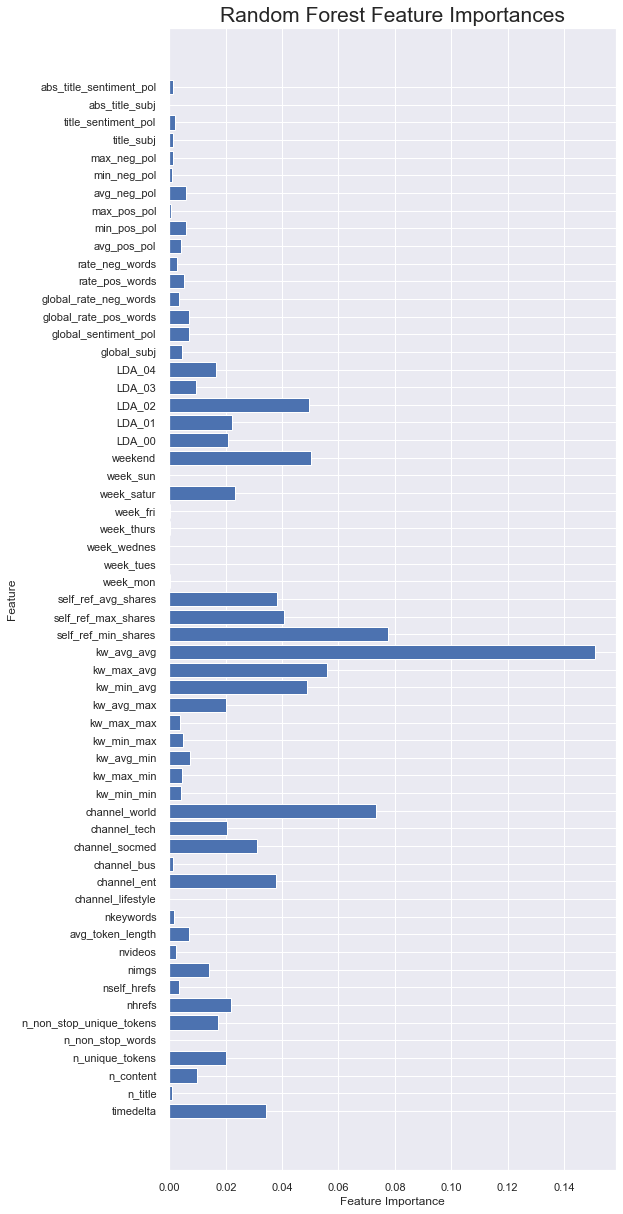

In [26]:
# visualizing Random Forest feature importances
plot_feature_importances(rf_model, "Random Forest Feature Importances")

### Forward Selection

In [27]:
# pipeline using step forward feature selection for 8-12 features
sfs1 = sfs(estimator=rf_model,
           n_jobs=-1,  # using all CPUs
           k_features=(8, 13),
           forward=True,
           floating=False,
           verbose=1,
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (ACC: %.3f): %s\n' % (
    round(sfs1.k_score_, 5), sfs1.k_feature_idx_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    6.3s finished
Features: 1/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    8.0s finished
Features: 2/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    7.0s finished
Features: 3/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    7.5s finished
Features: 4/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done

best combination (ACC: 0.655): (0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41)



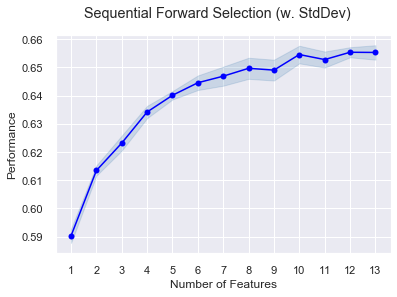

In [28]:
# visualize selection performance
plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.suptitle('Sequential Forward Selection (w. StdDev)',
             fontdict={'fontsize': 34,
                       'verticalalignment': 'top'})
plt.savefig('images/n-features.png', transparent=False)

> So:
* The score for the 12 selected features is slightly better than the all - features model.
* We can use our selected featues to create a slimmer `X` for training and testing.
* This will provide us with a much simpler set of relevant variables for modeling.

### Select Feature Subsets

In [29]:
# view the selected feature subsets as a dataframe
# the dataframe uses the number of features as column labels
# the `feature_names` index (3) holds selected column indexes
# as tuples
sub_feats_df = pd.DataFrame.from_dict(sfs1.subsets_)
print('all subsets:\n')
sub_feats_df

all subsets:



,1,2,3,4,5,6,7,8,9,10,11,12,13
feature_idx,"(26,)","(13, 26)","(13, 26, 37)","(13, 26, 37, 40)","(13, 26, 29, 37, 40)","(0, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41, 49)"
cv_scores,"[0.5942492012779552, 0.5881957289389608, 0.590...","[0.6125777703043551, 0.6176223305868506, 0.612...","[0.6228350428787623, 0.6253573230200101, 0.621...","[0.6320834033966706, 0.6341012275096687, 0.630...","[0.6403228518580797, 0.644358500084076, 0.6351...","[0.6406591558769127, 0.6480578442912392, 0.638...","[0.6428451319993274, 0.6497393643854044, 0.639...","[0.6473852362535732, 0.6541113166302337, 0.640...","[0.6473852362535732, 0.6549520766773163, 0.640...","[0.6463763241970741, 0.658483268875063, 0.6500...","[0.6500756684042375, 0.6483941483100724, 0.655...","[0.6520934925172356, 0.6613418530351438, 0.652...","[0.6478896922818228, 0.6536068606019841, 0.657..."
avg_score,0.590321,0.61346,0.62318,0.634178,0.640097,0.644537,0.646858,0.649649,0.64901,0.654526,0.652743,0.655333,0.655266
feature_names,"(26,)","(13, 26)","(13, 26, 37)","(13, 26, 37, 40)","(13, 26, 29, 37, 40)","(0, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41, 49)"


In [30]:
# listiing column indexes of the selected predictors
sub_feats = list(sfs1.k_feature_idx_)  # instantiate as a list

# viewing forward selected column indexes
print(sub_feats)

# viewing `sub_feats` names, transposed as a series
df_2.iloc[:, sub_feats].head(0).T

[0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41]


url
timedelta
n_unique_tokens
n_non_stop_words
channel_ent
channel_socmed
channel_tech
kw_avg_avg
self_ref_min_shares
self_ref_avg_shares
weekend


### Update X to Comprise Selected Features

In [31]:
# instantiating a variable for the subselected, best features
mod_X = df_2.iloc[:, sub_feats]

# feature selected dataframe with target
mod_df = pd.concat([mod_X, y], axis=1)

# viewing info for columns, shape, and dtypes
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 13 columns):
timedelta              39644 non-null float64
n_unique_tokens        39644 non-null float64
n_non_stop_words       39644 non-null float64
channel_ent            39644 non-null float64
channel_socmed         39644 non-null float64
channel_tech           39644 non-null float64
kw_avg_avg             39644 non-null float64
self_ref_min_shares    39644 non-null float64
self_ref_avg_shares    39644 non-null float64
weekend                39644 non-null float64
LDA_02                 39644 non-null float64
LDA_03                 39644 non-null float64
Shares_plus            39644 non-null int64
dtypes: float64(12), int64(1)
memory usage: 5.5+ MB


### Correlations Matrix for Selected Features

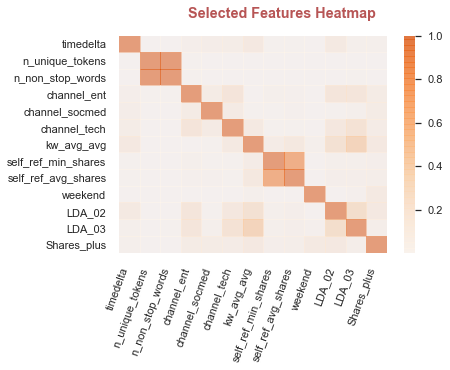

In [32]:
# calculate the correlation matrix
corr = mod_df.corr()

# plot the heatmap
# plt.autoscale = True
feat_heat = sns.heatmap(corr.abs(),
                        center=0.7,
                        cmap="Oranges", alpha=.5,
                        xticklabels=corr.columns,
                        yticklabels=corr.columns
                        )

feat_heat.set_xticklabels(
    feat_heat.get_xticklabels(),
    rotation=70,
    horizontalalignment='right',
    fontweight='light'
)

feat_heat

plt.suptitle("Selected Features Heatmap\n\n", 
             fontweight='bold', 
             color='brown', 
             alpha=0.8)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('images/sel-feats-heatmap.png',
            transparent=False, pad_inches=.5)

plt.show()

## XG Boost Gridsearch Pipeline

In [33]:
# spliting the dataframe outcome and predictor variables
X = mod_X  # selected important features
y = y  # target remains the same

# splitting the updated dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0
                                                    )


# building a pipeline with a scaler and a classifier
xgb_pipeline = Pipeline([('ss', StandardScaler()),
                         ('xgb', XGBClassifier(random_state=0))])


# defining the grid
grid = [{
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}]


# instantiating grid search
xgb_gridsearch = GridSearchCV(
    estimator=XGBClassifier(learning_rate=0.1,
                            n_estimators=100,
                            verbosity=1,
                            objective='binary:logistic',
                            verbose_eval=125,
                            early_stopping_rounds=500,
                            scale_pos_weight=1,
                            seed=0),
    param_grid=grid,
    scoring='accuracy',
    n_jobs=-1,
    iid=False,
    cv=5,
    verbose=3)


# fitting the training data
xgb_gridsearch.fit(X_train, y_train)


# viewing accuracy on the test set
pred = xgb_gridsearch.predict(X_test)


# xgb_gridsearch.best_estimator_

print(f"Optimal Parameters: {xgb_gridsearch.best_params_}\n")
print("xgb_gridsearch score: ", xgb_gridsearch.score(X_test,
                                                     y_test).round(2))
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  9.8min finished


Optimal Parameters: {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}

xgb_gridsearch score:  0.66

 [[3367 1706]
 [1673 3165]] 

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      5073
           1       0.65      0.65      0.65      4838

    accuracy                           0.66      9911
   macro avg       0.66      0.66      0.66      9911
weighted avg       0.66      0.66      0.66      9911



> We end up with an additional boost of ~ 1\%
* an accuracy score of 0.66
* a precision score of 0.67

So we are able to predict successfully whether or not an article will earn at least 1500 shares, better than 66\% of the time.